#  Classification, Parameter Tuning,  Model Deployment

## Import Packages

In [33]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

import pickle

## Prepare Data

In [34]:
df_org = pd.read_csv("drug200.csv")
df_org.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [35]:
df = df_org.copy()

## Handle Missing Data 

In [36]:
df.isna().sum()/len(df)*100

Age            0.0
Sex            0.0
BP             0.0
Cholesterol    0.0
Na_to_K        0.0
Drug           0.0
dtype: float64

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [38]:
print(df['Sex'].unique())
print(df['BP'].unique())
print(df['Cholesterol'].unique())
print(df['Drug'].unique())

['F' 'M']
['HIGH' 'LOW' 'NORMAL']
['HIGH' 'NORMAL']
['DrugY' 'drugC' 'drugX' 'drugA' 'drugB']


## Categotical Encoding

In [39]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [40]:
df['Sex'].unique()

array(['F', 'M'], dtype=object)

In [41]:
df['BP'].unique()

array(['HIGH', 'LOW', 'NORMAL'], dtype=object)

In [42]:
df['Cholesterol'].unique()

array(['HIGH', 'NORMAL'], dtype=object)

In [43]:
df['Drug'].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [44]:
#Encoding the object columns.
from sklearn.preprocessing import LabelEncoder

# sex_encoder = LabelEncoder().fit(['F', 'M'])
sex_encoder = LabelEncoder().fit(df['Sex'])

# bp_encoder = LabelEncoder().fit(['HIGH', 'LOW', 'NORMAL'])
bp_encoder = LabelEncoder().fit(df['BP'])

# cholesterol_encoder = LabelEncoder().fit(['HIGH', 'NORMAL'])
cholesterol_encoder = LabelEncoder().fit(df['Cholesterol'])

# drug_encoder = LabelEncoder().fit(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'])
drug_encoder = LabelEncoder().fit(df['Drug'])

In [45]:
sex_encoder.classes_

array(['F', 'M'], dtype=object)

In [46]:
bp_encoder.classes_

array(['HIGH', 'LOW', 'NORMAL'], dtype=object)

In [47]:
cholesterol_encoder.classes_

array(['HIGH', 'NORMAL'], dtype=object)

In [48]:
drug_encoder.classes_

array(['DrugY', 'drugA', 'drugB', 'drugC', 'drugX'], dtype=object)

In [49]:
#Encode categorical features
df['Sex'] = sex_encoder.transform(df['Sex'])
df['BP'] = bp_encoder.transform(df['BP'])
df['Cholesterol']= cholesterol_encoder.transform(df['Cholesterol'])
df['Drug']= drug_encoder.transform(df['Drug'])

## Train/Test Data Split 

In [50]:
X = df.drop('Drug', axis=1)
y = df['Drug']

In [51]:
X.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043


In [52]:
y.head()

0    0
1    3
2    3
3    4
4    0
Name: Drug, dtype: int32

In [53]:
# Split data into features and target
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Trining / Create Model using Support Vector Machines

### Grid Search

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

# Create a pipeline with StandardScaler and SVM classifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC())
])

# Define the hyperparameter grid to search
param_grid = {
    'svm__C': [0.1, 1, 10],
    'svm__kernel': ['linear', 'rbf'],
    'svm__gamma': [0.001, 0.01, 0.1, 1]
}

# Create a GridSearchCV object to perform hyperparameter tuning
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)

# Evaluate the model on the test data
accuracy = best_estimator.score(X_test, y_test)
print("Test Accuracy:", accuracy)

Best Hyperparameters: {'svm__C': 10, 'svm__gamma': 0.001, 'svm__kernel': 'linear'}
Test Accuracy: 1.0


### Use the Best Parameter

In [55]:
# Define the pipeline
model = Pipeline(steps=[
    ('scaler', StandardScaler()),  # Normalization step
    ('classifier', SVC(C=10, gamma=0.001, kernel='linear'))  # You can replace this with any other classifier
])

# Fit the pipeline
model.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', SVC(C=10, gamma=0.001, kernel='linear'))])

## Testing / Evaluation

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        15
           1     1.0000    1.0000    1.0000         6
           2     1.0000    1.0000    1.0000         3
           3     1.0000    1.0000    1.0000         5
           4     1.0000    1.0000    1.0000        11

    accuracy                         1.0000        40
   macro avg     1.0000    1.0000    1.0000        40
weighted avg     1.0000    1.0000    1.0000        40

Support Vector Machines accuracy is: 100.00%


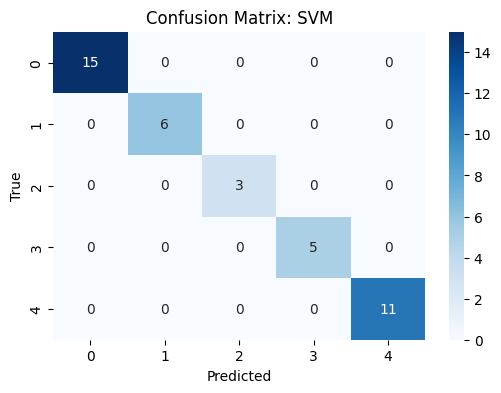

In [24]:
# Make predictions
y_pred = model.predict(X_test)

summary_eval = classification_report(y_test, y_pred, digits=4, zero_division=1)
print(summary_eval)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the accuracy score
from sklearn.metrics import accuracy_score
KNAcc = accuracy_score(y_pred,y_test)
print('Support Vector Machines accuracy is: {:.2f}%'.format(KNAcc*100))

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: SVM')
plt.xlabel('Predicted')
plt.ylabel('True')
# Save the plot as an image file (e.g., PNG)
plt.savefig('confusion_matrix_svm.png')

plt.show()

## Save Model and etc.

In [56]:
# Create a tuple or any container object with your variables
data_to_save = (model, drug_encoder, sex_encoder, bp_encoder, cholesterol_encoder)

# Open a file in binary write mode
with open('svm_drug_model.pkl', 'wb') as file:
    # Save the container object
    pickle.dump(data_to_save, file)

## Load Model and Prediction

Kernel -> Restart Kernel..

In [57]:
import pickle
import pandas as pd

### Load model

In [58]:
with open('svm_drug_model.pkl', 'rb') as file:
    # Load the data from the file
    model, drug_encoder, sex_encoder, bp_encoder, cholesterol_encoder = pickle.load(file)

### New data

In [59]:
x_new =  pd.DataFrame() 
x_new['Age'] = [51]
x_new['Sex'] = ['M']
x_new['BP'] = ['HIGH']
x_new['Cholesterol'] = ['NORMAL']
x_new['Na_to_K'] = [11.343]

### Categorical Data Encoding

In [60]:
x_new['Sex'] = sex_encoder.transform(x_new['Sex'])
x_new['BP'] = bp_encoder.transform(x_new['BP'])
x_new['Cholesterol'] = cholesterol_encoder.transform(x_new['Cholesterol'])

### Predicting

In [61]:
y_pred_new = model.predict(x_new)

result = drug_encoder.inverse_transform(y_pred_new) 

print('Predicted drug type: ', result)

Predicted drug type:  ['drugA']


## Create app_predict_knn_penguin.py for Running with streamlit

Run: streamlit run app_predict_knn_penguin.py

In [32]:
%%writefile app_predict_svm_drug.py
import streamlit as st
import numpy as np 
import pandas as pd 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import pickle

# Load model
with open('svm_drug_model.pkl', 'rb') as file:
    model, drug_encoder, sex_encoder, bp_encoder, cholesterol_encoder = pickle.load(file)

# Streamlit app
st.title("Drug Type Prediction")

# Get user input for each variable
age_input = st.slider('Enter Age:', 15, 75, 51)
sex_input = st.selectbox('Select Sex:', ['M', 'F'])
bp_input = st.selectbox('Select Blood Pressure Levels (BP):', ['LOW', 'NORMAL','HIGH'])
cholesterol_input = st.selectbox('Select Cholesterol Levels:', ['NORMAL','HIGH'])
Na_to_K_input = st.number_input('Na to Potassium Ration:', min_value=0.00, max_value=50.00, step=0.001, format="%.3f")

# Create a DataFrame with user input
x_new = pd.DataFrame({
    'Age': [age_input],
    'Sex': [sex_input],
    'BP': [bp_input],
    'Cholesterol': [cholesterol_input],
    'Na_to_K': [Na_to_K_input]
})

# Encoding
x_new['Sex'] = sex_encoder.transform(x_new['Sex'])
x_new['BP'] = bp_encoder.transform(x_new['BP'])
x_new['Cholesterol'] = cholesterol_encoder.transform(x_new['Cholesterol'])

# Prediction function
def predict_drug():
    y_pred_new = model.predict(x_new)
    result = drug_encoder.inverse_transform(y_pred_new)
    return result[0]

# "Predict" button
if st.button('Predict'):
    result = predict_drug()
    st.subheader('Prediction Result:')
    st.write(f'{result}')

Overwriting app_predict_svm_drug.py
